In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# API Key
from config import apikey

In [19]:
#https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo
base_url = "https://www.alphavantage.co/query?"
params = {
    "function":"TIME_SERIES_WEEKLY",
    "symbol":"",   
    "apikey":apikey
}

# Read in the stock data set
stock_data = pd.read_csv('Resources/Stocks.csv')
stock_data.head()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [20]:
#20 weeks we are looking to track the weekly close price for
hardcode_weeks = ["2019-10-04", "2019-10-11","2019-10-18", "2019-10-25", "2019-11-01", "2019-11-08",
                  "2019-11-15", "2019-11-22", "2019-11-29", "2019-12-06", "2019-12-13", "2019-12-20",
                  "2019-12-27", "2020-01-03", "2020-01-10", "2020-01-17", "2020-01-24", "2020-01-31",
                  "2020-02-07", "2020-02-14", "2020-02-21", "2020-02-28", "2020-03-06", "2020-03-13"]

In [21]:
#Make these weeks the columns in the df
for item in hardcode_weeks:
    stock_data[item]=""

In [11]:
#Make the API request for these weekly close price for all requested companies

for index, row in stock_data[95:100].iterrows():
    params['symbol']=row["Symbol"]
    response = requests.get(base_url, params=params).json()
    
    for week in hardcode_weeks: 
        try:
            stock_data.loc[index,week]= response["Weekly Time Series"][week]["4. close"]
        except:
            pass
            

stock_data.replace('', np.nan, inplace=True)            
edit_df.dropna(how="any", inplace = True)
edit_df["Difference"] = edit_df[hardcode_weeks[0]]-edit_df[hardcode_weeks[-1]]
stock_data.to_csv("500_stock_export.csv",index=False)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [49]:
#Using this code after the csv was created
stock_data = pd.read_csv('stock_export.csv')
stock_data.head()

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.09,173.15,...,180.47,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.28,52.08,...,47.62,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.66,83.74,...,85.36,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.75,85.21,...,89.06,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.22,189.70,...,207.66,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51


In [50]:
stock_data.describe()

,Unnamed: 0,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
count,505.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.00000,470.000000,469.000000,...,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,468.000000
mean,252.000000,120.623043,121.306872,122.308213,123.669277,125.026628,125.375117,126.56933,126.074096,127.543625,...,132.560494,135.089367,133.650815,130.109303,133.654646,136.532425,135.088391,119.793047,120.071781,107.573504
std,145.925209,171.184535,171.414298,174.272305,176.031730,177.167232,174.413476,174.90084,174.378388,177.622056,...,189.305526,191.037339,188.375447,185.363331,191.242092,196.867200,193.407271,173.774850,172.658631,159.866400
min,0.000000,3.660000,3.590000,3.680000,4.220000,4.250000,4.670000,4.23000,3.840000,3.490000,...,4.830000,3.960000,3.260000,3.000000,3.200000,3.090000,3.140000,2.770000,2.620000,2.820000
25%,126.000000,44.520000,45.155000,44.875000,46.372500,47.062500,46.615000,47.08000,46.872500,47.010000,...,47.891250,49.067500,47.842500,46.955000,47.442500,47.015000,46.550000,40.775000,39.257500,33.762500
50%,252.000000,83.860000,84.940000,85.815000,84.920000,85.930000,86.125000,87.45500,86.460000,87.390000,...,89.520000,91.230000,90.025000,85.655000,87.280000,89.620000,89.675000,78.240000,79.275000,70.445000
75%,378.000000,139.905000,138.692500,140.937500,143.250000,143.505000,143.417500,145.30750,144.022500,145.980000,...,149.302500,152.437500,151.332500,147.802500,153.395000,156.710000,154.647500,135.732500,137.207500,125.610000
max,504.000000,1983.200000,1977.180000,2013.530000,2055.930000,2032.020000,1879.190000,1848.82000,1877.530000,1904.030000,...,2086.900000,2054.690000,1962.960000,2008.720000,2079.280000,2134.870000,2095.970000,1883.750000,1901.090000,1785.000000


In [51]:
edit_df = stock_data.copy()

In [52]:
edit_df.replace('', np.nan, inplace=True)            
edit_df.dropna(how="any", inplace = True)
edit_df["Difference"] = edit_df[hardcode_weeks[0]]-edit_df[hardcode_weeks[-1]]
stock_data.to_csv("500_stock_export.csv",index=False)

In [53]:
edit_df.describe()

,Unnamed: 0,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,...,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,250.092275,121.167725,121.856760,122.865279,124.232972,125.590912,125.933187,127.135955,126.636706,128.074399,...,135.089367,133.650815,130.109303,133.654646,136.532425,135.088391,119.793047,120.071781,107.890472,13.277253
std,146.334313,171.796394,172.024684,174.892100,176.656091,177.795384,175.030032,175.516663,174.994658,178.063415,...,191.037339,188.375447,185.363331,191.242092,196.867200,193.407271,173.774850,172.658631,160.134741,35.733699
min,0.000000,3.660000,3.590000,3.680000,4.220000,4.250000,4.670000,4.230000,3.840000,3.490000,...,3.960000,3.260000,3.000000,3.200000,3.090000,3.140000,2.770000,2.620000,2.820000,-182.620000
25%,124.250000,44.590000,45.357500,45.397500,46.400000,47.170000,46.630000,47.175000,47.085000,47.555000,...,49.067500,47.842500,46.955000,47.442500,47.015000,46.550000,40.775000,39.257500,33.900000,3.011250
50%,247.500000,84.320000,85.325000,86.070000,85.465000,86.775000,86.285000,87.660000,86.825000,87.820000,...,91.230000,90.025000,85.655000,87.280000,89.620000,89.675000,78.240000,79.275000,70.715000,9.685000
75%,378.750000,140.422500,139.440000,141.840000,143.490000,143.702500,143.962500,145.422500,144.955000,145.980000,...,152.437500,151.332500,147.802500,153.395000,156.710000,154.647500,135.732500,137.207500,125.870000,21.080000
max,504.000000,1983.200000,1977.180000,2013.530000,2055.930000,2032.020000,1879.190000,1848.820000,1877.530000,1904.030000,...,2054.690000,1962.960000,2008.720000,2079.280000,2134.870000,2095.970000,1883.750000,1901.090000,1785.000000,561.870000


In [54]:
edit_df

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.090,173.15,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.280,52.08,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.660,83.74,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.750,85.21,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.220,189.70,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,XYL,Xylem Inc.,Industrials,75.97,77.63,79.78,83.30,79.120,77.33,...,83.46,81.48,81.66,84.20,88.14,88.52,77.34,81.22,72.12,3.85
501,501,YUM,Yum! Brands Inc,Consumer Discretionary,114.66,114.45,112.30,109.10,99.650,98.90,...,105.40,104.98,105.77,102.04,105.28,103.51,89.25,89.40,78.46,36.20
502,502,ZBH,Zimmer Biomet Holdings,Health Care,134.45,136.44,137.61,134.07,138.220,144.00,...,149.38,147.80,147.90,156.39,160.40,157.39,136.15,124.10,97.80,36.65
503,503,ZION,Zions Bancorp,Financials,43.20,44.09,44.72,47.95,49.345,51.07,...,50.74,46.63,45.49,46.23,46.26,45.43,39.95,35.28,29.42,13.78


In [55]:
edit_df.to_csv("500_stock_export.csv",index=False)

In [56]:
sector_df = edit_df.copy()

In [57]:
sector_df

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.090,173.15,...,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68,14.14
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.280,52.08,...,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49,4.02
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.660,83.74,...,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65,0.34
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.750,85.21,...,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37,-10.71
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.220,189.70,...,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51,23.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,XYL,Xylem Inc.,Industrials,75.97,77.63,79.78,83.30,79.120,77.33,...,83.46,81.48,81.66,84.20,88.14,88.52,77.34,81.22,72.12,3.85
501,501,YUM,Yum! Brands Inc,Consumer Discretionary,114.66,114.45,112.30,109.10,99.650,98.90,...,105.40,104.98,105.77,102.04,105.28,103.51,89.25,89.40,78.46,36.20
502,502,ZBH,Zimmer Biomet Holdings,Health Care,134.45,136.44,137.61,134.07,138.220,144.00,...,149.38,147.80,147.90,156.39,160.40,157.39,136.15,124.10,97.80,36.65
503,503,ZION,Zions Bancorp,Financials,43.20,44.09,44.72,47.95,49.345,51.07,...,50.74,46.63,45.49,46.23,46.26,45.43,39.95,35.28,29.42,13.78


In [58]:
#Prep data to be grouped by the sector
sector_df = sector_df.drop(["Symbol","Name"], axis=1)
sector_df = sector_df.set_index(["Sector"])

#Covert numbers to numeric values so groupby will complete
#sector_df[hardcode_weeks]= sector_df[hardcode_weeks].apply(pd.to_numeric, errors = "coerce")

#Group companies by their sector and return the means.
sector_df = sector_df.groupby(["Sector"]).mean()
sector_df

,Unnamed: 0,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,280.181818,150.975779,152.346623,154.383571,155.682468,156.319610,154.446039,153.821948,153.502597,156.032727,...,163.047078,159.644675,156.404481,159.324675,163.335455,161.617273,143.750649,140.200130,124.656039,26.319740
Consumer Staples,250.733333,92.192167,91.533667,91.195833,90.782000,90.512667,90.793333,91.333333,91.538333,92.429333,...,95.707667,95.204500,93.748000,95.787500,96.808333,96.178667,85.963000,91.549000,83.497333,8.694833
Energy,252.740741,46.462593,47.197778,46.100741,48.623333,48.590000,49.938148,49.339259,48.618148,47.780741,...,51.454074,48.728519,45.801852,46.324074,46.590000,46.731481,39.348519,35.187407,25.294074,21.168519
Financials,240.492063,92.388333,92.811905,93.571905,94.597302,96.402143,98.492698,98.666349,98.798889,99.663651,...,103.739683,102.195873,101.173016,104.230635,105.766667,104.361270,89.908095,87.252381,77.146984,15.241349
Health Care,233.927273,155.743909,155.795818,159.419000,160.992273,165.174000,165.438364,169.808273,171.283818,173.360545,...,184.018545,180.328545,172.708182,179.960182,183.956182,183.118909,164.644727,170.859636,156.790364,-1.046455
Industrials,253.968750,123.872109,125.941797,126.794375,129.086953,130.892656,132.775625,133.845000,133.004609,133.615938,...,139.756094,138.620469,134.233750,137.693438,139.265312,137.736719,121.281250,119.519375,104.808281,19.063828
Information Technology,236.432836,147.868881,149.027015,148.894179,151.500522,153.646119,156.361791,158.810746,156.718358,159.281045,...,174.562687,174.548358,168.712836,174.194627,179.186567,175.416119,157.667910,155.551940,144.333955,3.534925
Materials,259.227273,112.417273,114.131818,114.520000,116.207273,117.130455,118.960909,119.634545,117.525455,119.311364,...,121.295455,119.685455,115.970455,120.777727,120.953182,119.479091,105.575909,108.830909,95.765909,16.651364
Real Estate,262.843750,122.095312,121.188750,122.807813,121.790313,120.881562,116.390625,118.725000,117.303750,118.856250,...,121.672812,122.815781,121.121875,123.436875,129.334688,129.368437,113.829688,119.804688,111.363750,10.731562


In [59]:
sector_df.to_csv("500_bysector_export.csv",index=False)

In [60]:
renamed_df = sector_df.copy()
renamed_df.rename(index = {'Consumer Discretionary':'Cnsmr Dsctnry',
                           "Information Technology":"IT", 
                           "Telecommunication Services":"Telecoms"}, inplace = True)
renamed_df

,Unnamed: 0,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Cnsmr Dsctnry,280.181818,150.975779,152.346623,154.383571,155.682468,156.319610,154.446039,153.821948,153.502597,156.032727,...,163.047078,159.644675,156.404481,159.324675,163.335455,161.617273,143.750649,140.200130,124.656039,26.319740
Consumer Staples,250.733333,92.192167,91.533667,91.195833,90.782000,90.512667,90.793333,91.333333,91.538333,92.429333,...,95.707667,95.204500,93.748000,95.787500,96.808333,96.178667,85.963000,91.549000,83.497333,8.694833
Energy,252.740741,46.462593,47.197778,46.100741,48.623333,48.590000,49.938148,49.339259,48.618148,47.780741,...,51.454074,48.728519,45.801852,46.324074,46.590000,46.731481,39.348519,35.187407,25.294074,21.168519
Financials,240.492063,92.388333,92.811905,93.571905,94.597302,96.402143,98.492698,98.666349,98.798889,99.663651,...,103.739683,102.195873,101.173016,104.230635,105.766667,104.361270,89.908095,87.252381,77.146984,15.241349
Health Care,233.927273,155.743909,155.795818,159.419000,160.992273,165.174000,165.438364,169.808273,171.283818,173.360545,...,184.018545,180.328545,172.708182,179.960182,183.956182,183.118909,164.644727,170.859636,156.790364,-1.046455
Industrials,253.968750,123.872109,125.941797,126.794375,129.086953,130.892656,132.775625,133.845000,133.004609,133.615938,...,139.756094,138.620469,134.233750,137.693438,139.265312,137.736719,121.281250,119.519375,104.808281,19.063828
IT,236.432836,147.868881,149.027015,148.894179,151.500522,153.646119,156.361791,158.810746,156.718358,159.281045,...,174.562687,174.548358,168.712836,174.194627,179.186567,175.416119,157.667910,155.551940,144.333955,3.534925
Materials,259.227273,112.417273,114.131818,114.520000,116.207273,117.130455,118.960909,119.634545,117.525455,119.311364,...,121.295455,119.685455,115.970455,120.777727,120.953182,119.479091,105.575909,108.830909,95.765909,16.651364
Real Estate,262.843750,122.095312,121.188750,122.807813,121.790313,120.881562,116.390625,118.725000,117.303750,118.856250,...,121.672812,122.815781,121.121875,123.436875,129.334688,129.368437,113.829688,119.804688,111.363750,10.731562


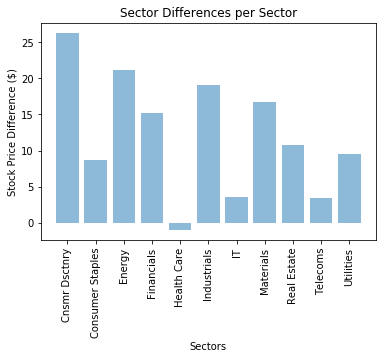

In [61]:
#Abbreviated Names on the chart

x=renamed_df.index
y=renamed_df["Difference"]

plt.bar(x, y, align='center', alpha=0.5)
plt.title("Sector Differences per Sector")
plt.xlabel("Sectors")
plt.ylabel("Stock Price Difference ($)")
plt.xticks(rotation=90)
plt.savefig('Sector_Difference.png')

plt.show()

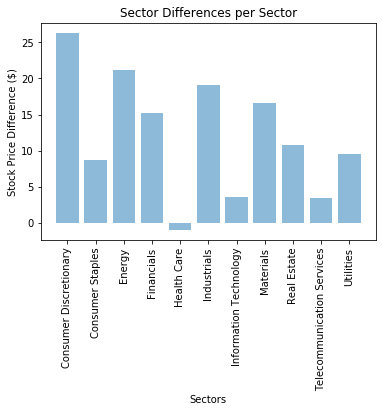

In [62]:
#Original Bar chart with sector by their differences
x=sector_df.index
y=sector_df["Difference"]

plt.bar(x, y, align='center', alpha=0.5)
plt.title("Sector Differences per Sector")
plt.xlabel("Sectors")
plt.ylabel("Stock Price Difference ($)")
plt.xticks(rotation=90)
plt.savefig('Sector_Difference.png',dpi=150)

plt.show()


In [63]:
stock_data

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
0,0,MMM,3M Company,Industrials,155.82,158.10,163.10,166.09,170.090,173.15,...,180.47,181.35,178.15,158.66,160.08,161.01,156.93,149.24,153.65,141.68
1,1,AOS,A.O. Smith Corp,Industrials,45.51,47.99,51.01,51.07,50.280,52.08,...,47.62,46.93,45.43,42.69,41.99,43.93,44.09,39.55,42.69,41.49
2,2,ABT,Abbott Laboratories,Health Care,81.99,79.63,82.79,81.65,82.660,83.74,...,85.36,89.00,90.40,87.14,87.87,89.66,87.45,77.03,81.74,81.65
3,3,ABBV,AbbVie Inc.,Health Care,74.66,73.63,76.46,76.53,81.750,85.21,...,89.06,88.00,83.54,81.02,92.29,94.05,94.96,85.71,88.82,85.37
4,4,ACN,Accenture plc,Information Technology,189.64,184.97,187.08,183.07,188.220,189.70,...,207.66,209.20,208.57,205.21,211.58,212.37,211.89,180.59,178.75,166.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,XYL,Xylem Inc.,Industrials,75.97,77.63,79.78,83.30,79.120,77.33,...,79.94,83.46,81.48,81.66,84.20,88.14,88.52,77.34,81.22,72.12
501,501,YUM,Yum! Brands Inc,Consumer Discretionary,114.66,114.45,112.30,109.10,99.650,98.90,...,101.69,105.40,104.98,105.77,102.04,105.28,103.51,89.25,89.40,78.46
502,502,ZBH,Zimmer Biomet Holdings,Health Care,134.45,136.44,137.61,134.07,138.220,144.00,...,149.99,149.38,147.80,147.90,156.39,160.40,157.39,136.15,124.10,97.80
503,503,ZION,Zions Bancorp,Financials,43.20,44.09,44.72,47.95,49.345,51.07,...,50.67,50.74,46.63,45.49,46.23,46.26,45.43,39.95,35.28,29.42


In [64]:
#Pull out only the most impacted sector, Consumer Discretionary
cd_df = stock_data.loc[stock_data['Sector'] == 'Consumer Discretionary']
cd_df

,Unnamed: 0,Symbol,Name,Sector,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
8,8,AAP,Advance Auto Parts,Consumer Discretionary,159.94,158.56,163.50,165.560,164.82,167.40,...,149.01,151.05,141.68,131.75,132.93,133.59,140.61,132.98,127.91,113.69
30,30,AMZN,Amazon.com Inc.,Consumer Discretionary,1739.65,1731.92,1757.51,1761.330,1791.44,1785.88,...,1883.16,1864.72,1861.64,2008.72,2079.28,2134.87,2095.97,1883.75,1901.09,1785.00
53,53,APTV,Aptiv Plc,Consumer Discretionary,83.43,86.26,88.96,89.580,92.35,96.88,...,89.51,91.53,91.54,84.79,87.13,88.32,90.07,78.11,76.29,66.47
61,61,AZO,AutoZone Inc,Consumer Discretionary,1060.33,1085.97,1110.00,1129.470,1156.28,1165.86,...,1132.22,1154.58,1140.23,1057.96,1058.91,1053.21,1068.03,1032.51,1060.31,1012.73
71,71,BBY,Best Buy Co. Inc.,Consumer Discretionary,66.89,69.53,70.52,73.150,72.92,76.85,...,90.65,89.94,89.44,84.69,87.02,90.21,90.26,75.65,73.82,61.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,476,VIAB,Viacom Inc.,Consumer Discretionary,23.26,23.02,22.05,21.655,21.99,22.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,491,WHR,Whirlpool Corp.,Consumer Discretionary,155.33,158.22,161.06,159.360,150.07,154.77,...,149.68,152.63,149.42,146.17,149.21,152.16,147.19,127.86,121.12,115.43
494,494,WYN,Wyndham Worldwide,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,495,WYNN,Wynn Resorts Ltd,Consumer Discretionary,108.91,112.78,113.52,120.850,123.19,126.47,...,143.01,151.62,134.75,126.16,126.91,132.14,127.95,107.98,94.03,72.52


In [65]:
#Prep data for graph, by removing the unneed columns and setting the index.
cddate_df=cd_df.set_index(['Symbol'])
cddate_df=cddate_df.drop(['Sector', 'Name'], axis=1)
cddate_df

,Unnamed: 0,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,...,2020-01-10,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13
Symbol,,,,,,,,,,,,,,,,,,,,,
AAP,8,159.94,158.56,163.50,165.560,164.82,167.40,162.66,157.87,157.08,...,149.01,151.05,141.68,131.75,132.93,133.59,140.61,132.98,127.91,113.69
AMZN,30,1739.65,1731.92,1757.51,1761.330,1791.44,1785.88,1739.49,1745.72,1800.80,...,1883.16,1864.72,1861.64,2008.72,2079.28,2134.87,2095.97,1883.75,1901.09,1785.00
APTV,53,83.43,86.26,88.96,89.580,92.35,96.88,92.31,91.47,93.88,...,89.51,91.53,91.54,84.79,87.13,88.32,90.07,78.11,76.29,66.47
AZO,61,1060.33,1085.97,1110.00,1129.470,1156.28,1165.86,1171.88,1163.87,1177.92,...,1132.22,1154.58,1140.23,1057.96,1058.91,1053.21,1068.03,1032.51,1060.31,1012.73
BBY,71,66.89,69.53,70.52,73.150,72.92,76.85,77.09,72.64,80.64,...,90.65,89.94,89.44,84.69,87.02,90.21,90.26,75.65,73.82,61.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIAB,476,23.26,23.02,22.05,21.655,21.99,22.75,23.06,23.65,24.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WHR,491,155.33,158.22,161.06,159.360,150.07,154.77,144.36,144.07,143.10,...,149.68,152.63,149.42,146.17,149.21,152.16,147.19,127.86,121.12,115.43
WYN,494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
cddate_df=cddate_df.swapaxes("index", "columns") 
cddate_df=cddate_df.reset_index()
cddate_df=cddate_df.rename(columns={"index": "date_range"})
cddate_df

Symbol,date_range,AAP,AMZN,APTV,AZO,BBY,BKNG,BWA,KMX,CCL,...,FOX,ULTA,UAA,UA,VFC,VIAB,WHR,WYN,WYNN,YUM
0,Unnamed: 0,8.00,30.00,53.00,61.00,71.00,76.00,77.00,91.00,92.00,...,453.000,457.00,458.00,459.00,468.00,476.000,491.00,494.0,495.00,501.00
1,2019-10-04,159.94,1739.65,83.43,1060.33,66.89,1983.20,35.15,85.60,41.14,...,30.485,250.60,19.31,17.59,88.69,23.260,155.33,NaN,108.91,114.66
2,2019-10-11,158.56,1731.92,86.26,1085.97,69.53,1977.18,37.20,90.53,41.55,...,31.160,248.46,19.99,18.26,90.89,23.020,158.22,NaN,112.78,114.45
3,2019-10-18,163.50,1757.51,88.96,1110.00,70.52,2013.53,38.74,94.28,42.79,...,31.525,239.92,19.69,17.81,92.47,22.050,161.06,NaN,113.52,112.30
4,2019-10-25,165.56,1761.33,89.58,1129.47,73.15,2055.93,39.72,94.77,44.57,...,31.700,240.90,21.06,19.06,84.15,21.655,159.36,NaN,120.85,109.10
5,2019-11-01,164.82,1791.44,92.35,1156.28,72.92,2032.02,43.65,94.86,42.95,...,31.860,233.11,21.14,18.91,82.89,21.990,150.07,NaN,123.19,99.65
6,2019-11-08,167.40,1785.88,96.88,1165.86,76.85,1879.19,46.31,93.88,45.05,...,34.430,239.29,17.56,15.88,87.07,22.750,154.77,NaN,126.47,98.90
7,2019-11-15,162.66,1739.49,92.31,1171.88,77.09,1848.82,44.59,98.00,44.85,...,33.595,246.30,17.79,15.97,86.88,23.060,144.36,NaN,117.70,98.28
8,2019-11-22,157.87,1745.72,91.47,1163.87,72.64,1877.53,42.79,97.58,43.68,...,34.875,228.86,17.43,15.66,86.51,23.650,144.07,NaN,119.16,97.62
9,2019-11-29,157.08,1800.80,93.88,1177.92,80.64,1904.03,42.05,97.26,45.08,...,34.980,233.86,18.89,17.30,88.54,24.070,143.10,NaN,120.85,100.67


In [50]:
cddate = cddate_df.index.astype('O')
cddate_df.set_index("date_range", inplace = True)
cddate_df

Symbol,AMZN,TIF,CHTR,LB,MAT,F,NWSA,NWS,TJX,IPG,...,DLTR,ULTA,AAP,AZO,DRI,HAS,EXPE,RCL,CMG,BKNG
date_range,,,,,,,,,,,,,,,,,,,,,
10/4/19,1739.65,88.06,427.72,18.46,11.025,8.74,13.860,14.115,55.29,20.85,...,115.725,250.60,159.94,1060.33,116.42,118.24,133.22,103.31,823.93,1983.20
10/11/19,1731.92,91.88,423.16,17.50,11.670,8.78,13.500,13.760,58.57,20.08,...,115.190,248.46,158.56,1085.97,113.04,121.29,138.27,107.57,830.35,1977.18
10/18/19,1757.51,88.49,440.05,16.31,11.225,9.29,13.470,13.790,60.36,20.65,...,116.980,239.92,163.50,1110.00,110.45,121.96,136.03,111.18,841.48,2013.53
10/25/19,1761.33,98.55,462.19,17.76,10.170,8.72,13.800,14.210,59.10,21.85,...,114.550,240.90,165.56,1129.47,112.37,96.01,137.06,111.37,787.87,2055.93
11/1/19,1791.44,127.00,476.48,17.54,11.890,8.89,13.760,14.180,58.01,21.95,...,111.740,233.11,164.82,1156.28,112.17,96.44,137.80,111.18,768.63,2032.02
11/8/19,1785.88,125.67,469.75,17.75,12.160,9.04,12.900,13.230,59.23,22.97,...,110.350,239.29,167.40,1165.86,114.91,95.53,101.32,114.53,731.62,1879.19
11/15/19,1739.49,125.08,475.60,18.07,11.760,8.95,12.990,13.320,59.82,22.33,...,108.850,246.30,162.66,1171.88,112.60,95.41,95.67,117.89,754.66,1848.82
11/22/19,1745.72,125.51,468.50,18.01,11.670,8.89,12.710,12.980,59.18,22.09,...,109.040,228.86,157.87,1163.87,114.67,96.12,96.63,119.13,772.61,1877.53
11/29/19,1800.80,133.80,470.01,19.14,11.700,9.06,12.880,13.170,61.13,22.40,...,91.460,233.86,157.08,1177.92,118.44,101.70,101.66,120.02,813.92,1904.03


In [67]:
new_dict = {"date_range":[], "value":[]}
rowNum = 0
for index, row in cddate_df[:-2].iterrows():
    for x in range(len(cddate_df.columns)-1):
        new_dict["date_range"].append(index)
        value = cddate_df.iloc[rowNum+1,x+1] - cddate_df.iloc[rowNum,x+1]
        new_dict["value"].append(value)
    rowNum = rowNum + 1

In [68]:
scatter_df = pd.DataFrame(new_dict)
scatter_df.head()

,date_range,value
0,0,151.94
1,0,1709.65
2,0,30.43
3,0,999.33
4,0,-4.11


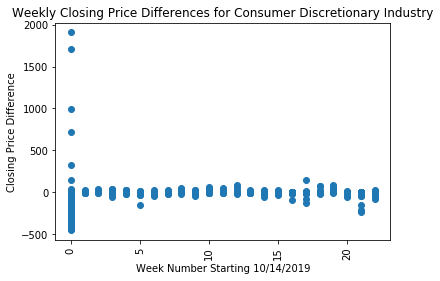

In [69]:
x = scatter_df['date_range']
y = scatter_df['value']

plt.scatter(scatter_df['date_range'],scatter_df['value'])
plt.title("Weekly Closing Price Differences for Consumer Discretionary Industry")
plt.ylabel("Closing Price Difference")
plt.xlabel("Week Number Starting 10/14/2019")
plt.xticks(rotation=90)
plt.savefig('Scatter_ConsDiscr.png')

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#regress_values = x * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.plot(x,regress_values,"r-")
#plt.annotate(line_eq,(10,-1000),fontsize=15,color="red")
#print(f"The r-squared is: {rvalue}")
plt.show()

In [72]:
cleaned_stocks=edit_df.copy()
#cleaned_stocks=stocks_df.dropna()
#cleaned_stocks=cleaned_stocks.drop(['Unnamed: 0'], axis=1)
cleaned_stocks.head()

sector_df=cleaned_stocks.groupby("Sector").mean()
sector_df.head(11)

,Unnamed: 0,2019-10-04,2019-10-11,2019-10-18,2019-10-25,2019-11-01,2019-11-08,2019-11-15,2019-11-22,2019-11-29,...,2020-01-17,2020-01-24,2020-01-31,2020-02-07,2020-02-14,2020-02-21,2020-02-28,2020-03-06,2020-03-13,Difference
Sector,,,,,,,,,,,,,,,,,,,,,
Consumer Discretionary,280.181818,150.975779,152.346623,154.383571,155.682468,156.319610,154.446039,153.821948,153.502597,156.032727,...,163.047078,159.644675,156.404481,159.324675,163.335455,161.617273,143.750649,140.200130,124.656039,26.319740
Consumer Staples,250.733333,92.192167,91.533667,91.195833,90.782000,90.512667,90.793333,91.333333,91.538333,92.429333,...,95.707667,95.204500,93.748000,95.787500,96.808333,96.178667,85.963000,91.549000,83.497333,8.694833
Energy,252.740741,46.462593,47.197778,46.100741,48.623333,48.590000,49.938148,49.339259,48.618148,47.780741,...,51.454074,48.728519,45.801852,46.324074,46.590000,46.731481,39.348519,35.187407,25.294074,21.168519
Financials,240.492063,92.388333,92.811905,93.571905,94.597302,96.402143,98.492698,98.666349,98.798889,99.663651,...,103.739683,102.195873,101.173016,104.230635,105.766667,104.361270,89.908095,87.252381,77.146984,15.241349
Health Care,233.927273,155.743909,155.795818,159.419000,160.992273,165.174000,165.438364,169.808273,171.283818,173.360545,...,184.018545,180.328545,172.708182,179.960182,183.956182,183.118909,164.644727,170.859636,156.790364,-1.046455
Industrials,253.968750,123.872109,125.941797,126.794375,129.086953,130.892656,132.775625,133.845000,133.004609,133.615938,...,139.756094,138.620469,134.233750,137.693438,139.265312,137.736719,121.281250,119.519375,104.808281,19.063828
Information Technology,236.432836,147.868881,149.027015,148.894179,151.500522,153.646119,156.361791,158.810746,156.718358,159.281045,...,174.562687,174.548358,168.712836,174.194627,179.186567,175.416119,157.667910,155.551940,144.333955,3.534925
Materials,259.227273,112.417273,114.131818,114.520000,116.207273,117.130455,118.960909,119.634545,117.525455,119.311364,...,121.295455,119.685455,115.970455,120.777727,120.953182,119.479091,105.575909,108.830909,95.765909,16.651364
Real Estate,262.843750,122.095312,121.188750,122.807813,121.790313,120.881562,116.390625,118.725000,117.303750,118.856250,...,121.672812,122.815781,121.121875,123.436875,129.334688,129.368437,113.829688,119.804688,111.363750,10.731562


In [73]:
sectors = ['Consumer Discretionary', 'Consumer Staples', 'Energy', 'Financials', 'Health Care',
          'Industrials', 'Information Technology', 'Materials', 'Real Estate',
          'Telecommunication Services', 'Utilities']

partDf = edit_df.loc[edit_df['Sector'] == 'Consumer Discretionary']

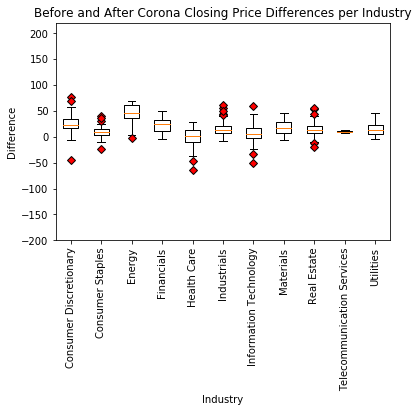

In [75]:
edit_df["Percent Diff"] = edit_df["Difference"]/edit_df["2019-10-04"]*100
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Before and After Corona Closing Price Differences per Industry')
ax1.set_ylabel('Difference')
ax1.set_xlabel('Industry')
plt.xticks(rotation=90)
plt.ylim(-200,220)
red_diamond = dict(markerfacecolor='r', marker='D')
diffList = []
for sec in sectors:
    partialDf = edit_df.loc[edit_df['Sector'] == sec]
    diffs = partialDf["Percent Diff"]
    diffList.append(diffs)
ax1.boxplot(diffList, labels=sectors, flierprops=red_diamond)
plt.savefig('Sector_BoxPlot.png')
plt.show()